<a href="https://www.kaggle.com/code/osman0/gym-equipment-classification-with-pytorch?scriptVersionId=204961346" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Gym Equipment Classification with PyTorch
This notebook aims to classify different types of gym equipment using images. By leveraging deep learning models in PyTorch, we can build an image classification model that accurately categorizes equipment such as dumbbells, elliptical machines, and more. Below is a visual overview of some equipment types used in this project.

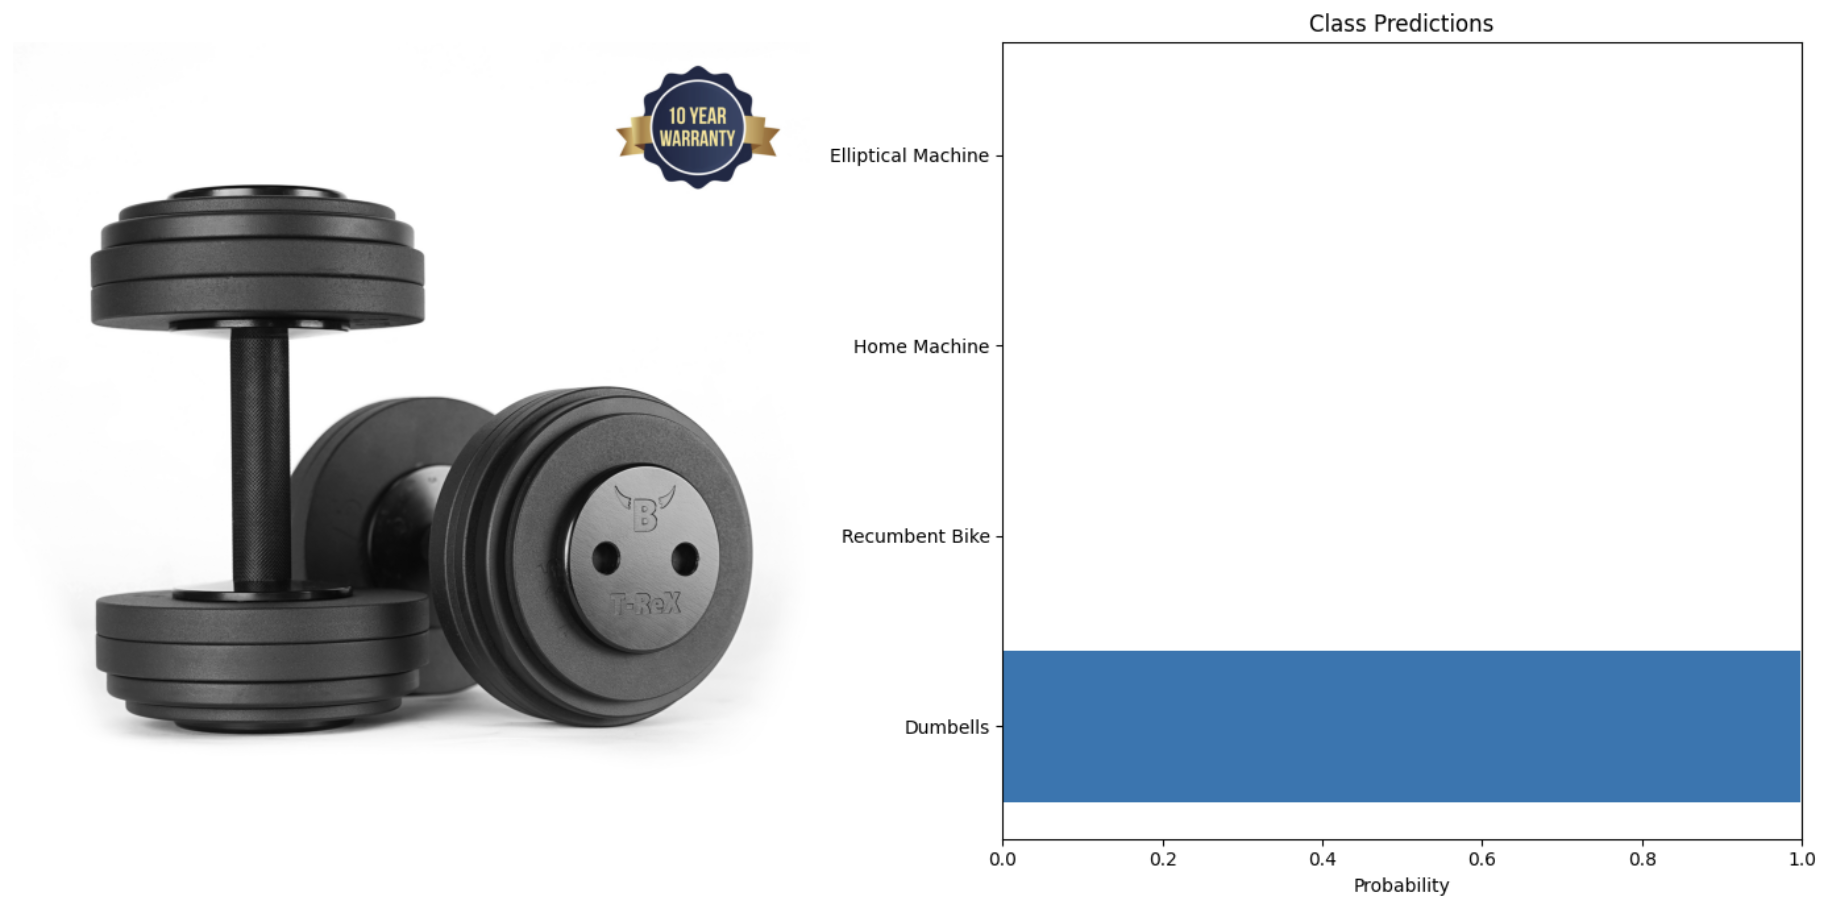


## 1. Libraries and Dependencies

* ### Import all necessary libraries, including PyTorch, torchvision, and any other dependencies. 



In [ ]:
# Install necessary libraries
!pip install torch torchvision
!pip install matplotlib numpy
!pip install seaborn scikit-learn 

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import os

## 2. Data Loading and Visualization

* Load the dataset and display a few sample images from each category to give an overview of the data. This helps understand the diversity in the images and how each category appears.

In [ ]:
# Define data directory and load dataset
# data_dir = 'path_to_your_data_directory'
# my data 
data_dir = '/kaggle/input/gymdata/Second-PyTorch-Project/train'
# Example transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
train_data = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
valid_data = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=transform)

# Display a few images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display some training images
images, labels = next(iter(DataLoader(train_data, batch_size=4)))
imshow(torchvision.utils.make_grid(images))


## 4. Data Preprocessing
* Define transformations for data augmentation and normalization to improve model performance. Show examples of augmented images to illustrate how data augmentation increases variability in the dataset.

In [ ]:
# Define transformations for training and validation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

## 4. Model Selection 
* Choose a pre-trained model like ResNet, modify the final layer for classification, and explain why this model was chosen.

In [ ]:
# Load pre-trained ResNet model and modify the final layer
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_data.classes))

## 5. Define Training and Evaluation Functions
* Write functions for training the model, calculating accuracy, and evaluating performance.

In [ ]:
# Training function
def train_model(model, criterion, optimizer, num_epochs=10):
    # Training logic here
    pass  # Fill in with training loop

# Evaluation function
def evaluate_model(model, dataloader):
    # Evaluation logic here
    pass  # Fill in with evaluation loop

## 6. Model Training 
* Train the model using the training dataset. Use a line plot to display the training and validation loss or accuracy over epochs to visualize the model’s learning progress.

In [ ]:
# Initialize loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
model = train_model(model, criterion, optimizer, num_epochs=10)

# Plot training and validation loss over epochs
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss over Epochs")
plt.show()

## 7. Model Evaluation
* Test the model on the validation set and display metrics like accuracy. Include a confusion matrix to illustrate which classes the model performs well on and where there may be confusion.

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 8. Sample Predictions
* Show sample predictions with actual vs. predicted labels for a few test images. This section provides a visual check on how well the model can identify different types of equipment.

In [ ]:
# Show predictions on test images
images, labels = next(iter(valid_data_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)

# Display images with predicted and actual labels
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i].permute(1, 2, 0).numpy())
    plt.title(f'Actual: {class_names[labels[i]]} | Predicted: {class_names[preds[i]]}')
plt.show()

## 9. Conclusion and Future Work
* Summarize the results, including model accuracy and observations from the confusion matrix. Mention potential improvements, such as expanding the dataset or experimenting with different model architectures, to further improve performance.

#### Conclusion
The model achieved an accuracy of X%(Depends of Dataset quality) on the validation set, indicating it can effectively classify various types of gym equipment. The confusion matrix shows which classes are most easily confused, providing insights for future improvements. Expanding the dataset or experimenting with different architectures could help enhance model accuracy further.
